# Thesaurus : NLTK (WordNet)

In [1]:
import nltk
print(nltk.__version__)

nltk.download('wordnet')   # download wordnet first and then import it
from nltk.corpus import wordnet

3.3
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jiankaiwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Synonymous Words

Fetch all synsets related to noun `car`.

In [2]:
wordnet.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

Set the synset to specific set and get its definition.

In [3]:
car_n_01 = wordnet.synset('car.n.01')
car_n_01.definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

Get the synonymous words.

In [4]:
car_n_01.lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

## WordNet /w Hypernym

In [5]:
car_n_01.hypernym_paths()

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('instrumentality.n.03'),
  Synset('container.n.01'),
  Synset('wheeled_vehicle.n.01'),
  Synset('self-propelled_vehicle.n.01'),
  Synset('motor_vehicle.n.01'),
  Synset('car.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('instrumentality.n.03'),
  Synset('conveyance.n.03'),
  Synset('vehicle.n.01'),
  Synset('wheeled_vehicle.n.01'),
  Synset('self-propelled_vehicle.n.01'),
  Synset('motor_vehicle.n.01'),
  Synset('car.n.01')]]

## Word Similarity

In [6]:
car = wordnet.synset("car.n.01")
novel = wordnet.synset("novel.n.01")
dog = wordnet.synset("dog.n.01")
motorcycle = wordnet.synset("motorcycle.n.01")

In [7]:
car.path_similarity(novel)

0.05555555555555555

In [8]:
car.path_similarity(dog)

0.07692307692307693

In [9]:
car.path_similarity(motorcycle)

0.3333333333333333

# Corpus

## Text Spliting

In [10]:
import re
import numpy as np

In [11]:
text = "You say goodbay and I say hello."
text = text.lower()
words = re.findall('(\w+|\.)', text)

In [12]:
words

['you', 'say', 'goodbay', 'and', 'i', 'say', 'hello', '.']

In [13]:
word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        w_id = len(word_to_id)
        word_to_id[word] = w_id
        id_to_word[w_id] = word

In [14]:
word_to_id

{'you': 0, 'say': 1, 'goodbay': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [15]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbay', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [16]:
corpus = [word_to_id[word] for word in words]
corpus

[0, 1, 2, 3, 4, 1, 5, 6]

In [17]:
def preprocess(text):
    text = text.lower()
    words = re.findall("(\w+|\.)", text)
    
    word_to_id = {}
    id_to_word = {}

    for word in words:
        if word not in word_to_id:
            w_id = len(word_to_id)
            word_to_id[word] = w_id
            id_to_word[w_id] = word
            
    corpus = [word_to_id[word] for word in words]
            
    return corpus, word_to_id, id_to_word

In [18]:
_corpus, _word_to_id, _id_to_word = preprocess("You say goodbye and I say hello.")
print(_corpus)
print(_word_to_id)
print(_id_to_word)

[0, 1, 2, 3, 4, 1, 5, 6]
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


## Distributional (/Statistical) Hypothesis

The word's meaning depends on the ones surrounding it.

### Window based Co-occurrence Matrix

In [19]:
def create_to_matrix(corpus, vocab_size, window_size=1):
    corpus_length = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int)
    
    for idx, word_id in enumerate(corpus):
        for i in range(0, window_size, 1):
            left_idx = idx - 1
            right_idx = idx + 1
            
            if left_idx >= 0:
                co_matrix[word_id, corpus[left_idx]] += 1
            
            if right_idx < corpus_length:
                co_matrix[word_id, corpus[right_idx]] += 1
                
    return co_matrix

In [20]:
cm = create_to_matrix(_corpus, vocab_size=7, window_size=1)
cm

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

In [21]:
def cos_similarity(x, y, eps=1e-8):
    nx = x / np.sqrt(np.sum(x ** 2.0) + eps)
    ny = y / np.sqrt(np.sum(y ** 2.0) + eps)
    return np.dot(nx, ny)

Calculate the cos similarity between words `you` and `i`.

In [22]:
cos_similarity(cm[word_to_id['you']], cm[word_to_id['i']])

0.7071067758832467

### Similarity Ranking

In [23]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    if query not in word_to_id:
        print("The query '{}' was not found.")
        return
    
    query_id = word_to_id[query]
    query_vec = word_matrix[word_to_id[query]]
    
    # similarity
    word_size = len(word_to_id)
    similarity = np.zeros(word_size)
    for i in range(word_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
    
    # list the top N
    count = 0
    for i in (-1 * similarity).argsort():
        if i == query_id:
            continue
        
        print("{}: {}".format(id_to_word[i], similarity[i]))
        
        count += 1
        if count >= top:
            return

In [24]:
most_similar('you', _word_to_id, _id_to_word, cm, top=5)

goodbye: 0.7071067758832467
i: 0.7071067758832467
hello: 0.7071067758832467
say: 0.0
and: 0.0


## Improving Distributional Hypothesis

Co-matrix implicit weaknesses showing co-occurrence with two non-related words. This may be because one of the word is a highly frequent word, e.g. `the` in the `the car`.

### P-PMI (Positive-Pointwise Mutual Information)

$$PMI(x, y) = log_{2}\frac{P(x, y)}{P(x)P(y)}=\frac{\frac{C(x,y)}{N}}{\frac{C(x)}{N}\frac{C(y)}{N}}=\frac{C(x,y)*N}{C(x)C(y)}$$

PMI stands for the relation with x and y.

$$PPMI(x, y)=max(0, PMI(x, y))$$

In [25]:
np.sum(cm, axis=0)

array([1, 4, 2, 2, 2, 2, 1])

In [26]:
def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i,j] * N / (S[i] * S[j]) + eps)
            ppmi = np.maximum(0, pmi)
            M[i, j] = ppmi
            
            if verbose:
                cnt += 1
                print("{:.1f}% Done.".format((cnt / total) * 100.0))
    return M

In [27]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
comatrx = create_to_matrix(corpus=corpus, vocab_size=len(word_to_id), window_size=1)
M = ppmi(comatrx, verbose=False)

In [28]:
print("Cooccurence Matrix")
print(comatrx)
print('-' * 100)
print("PPMI")
print(M)

Cooccurence Matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
----------------------------------------------------------------------------------------------------
PPMI
[[0.        1.8073549 0.        0.        0.        0.        0.       ]
 [1.8073549 0.        0.8073549 0.        0.8073549 0.8073549 0.       ]
 [0.        0.8073549 0.        1.8073549 0.        0.        0.       ]
 [0.        0.        1.8073549 0.        1.8073549 0.        0.       ]
 [0.        0.8073549 0.        1.8073549 0.        0.        0.       ]
 [0.        0.8073549 0.        0.        0.        0.        2.807355 ]
 [0.        0.        0.        0.        0.        2.807355  0.       ]]


## Dimensional Reduction

PPMI does solve the weakness of the co-occurrence matrix, but it leaves too many useless elements or redundant features ("0" on the matrix above). We also called it (the above matrix) sparse matrix. In the following, we are going to introduce dimensional reduction.

We can reduce dimensions from a sparse matrix into a dense matrix.

### SVD (Singular Value Decomposition)

$$X = U * S * V^{T}$$

In [29]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
comatrx = create_to_matrix(corpus=corpus, vocab_size=len(word_to_id), window_size=1)
PPMI_matrix = ppmi(comatrx)

# SVD
U, S, V = np.linalg.svd(PPMI_matrix)

In [30]:
U

array([[ 3.40948761e-01,  0.00000000e+00, -1.20516241e-01,
        -3.88578059e-16, -9.32324946e-01, -1.11022302e-16,
        -2.42574685e-17],
       [ 0.00000000e+00, -5.97636402e-01,  0.00000000e+00,
         1.80237904e-01,  0.00000000e+00, -7.81245828e-01,
         0.00000000e+00],
       [ 4.36312199e-01, -5.55111512e-17, -5.08782864e-01,
        -2.22044605e-16,  2.25325629e-01, -1.38777878e-17,
        -7.07106769e-01],
       [ 1.11022302e-16, -4.97828126e-01,  2.77555756e-17,
         6.80396318e-01, -1.11022302e-16,  5.37799239e-01,
         7.46693292e-17],
       [ 4.36312199e-01, -3.12375064e-17, -5.08782864e-01,
        -1.59998290e-16,  2.25325629e-01, -1.30164976e-17,
         7.07106769e-01],
       [ 7.09237099e-01, -3.12375064e-17,  6.83926761e-01,
        -1.59998290e-16,  1.70958877e-01, -1.30164976e-17,
         2.31390806e-17],
       [-1.66533454e-16, -6.28488600e-01, -4.16333634e-17,
        -7.10334539e-01,  2.22044605e-16,  3.16902101e-01,
        -9.6143156

In [31]:
V

array([[-0.0000000e+00,  5.9763640e-01,  1.6653345e-16,  4.9782813e-01,
         2.7755576e-16, -2.2204460e-16,  6.2848860e-01],
       [-3.4094876e-01,  0.0000000e+00, -4.3631220e-01,  0.0000000e+00,
        -4.3631220e-01, -7.0923710e-01, -0.0000000e+00],
       [ 0.0000000e+00, -1.8023790e-01,  1.3877788e-17, -6.8039632e-01,
        -1.1102230e-16,  8.3266727e-17,  7.1033454e-01],
       [ 1.2051624e-01, -5.5511151e-16,  5.0878286e-01,  0.0000000e+00,
         5.0878286e-01, -6.8392676e-01, -0.0000000e+00],
       [ 0.0000000e+00, -7.8124583e-01, -3.3306691e-16,  5.3779924e-01,
        -1.6653345e-16,  2.7755576e-16,  3.1690210e-01],
       [-9.3232495e-01, -5.5511151e-17,  2.2532563e-01,  0.0000000e+00,
         2.2532563e-01,  1.7095888e-01, -0.0000000e+00],
       [ 0.0000000e+00, -3.2049378e-17, -7.0710677e-01,  2.7755576e-17,
         7.0710677e-01, -3.7007435e-17, -2.7755576e-17]], dtype=float32)

In [32]:
# orthogonal property
np.dot(U[0,:], V[:,0])

5.667889e-17

`U` stands for a dense matrix. If a dense matrix is reduced into two dimensions, only requires capturing the first two elements.

In [33]:
# reduce to the two dimensions
U[0, :2]

array([0.34094876, 0.        ], dtype=float32)

In [34]:
import matplotlib.pyplot as plt

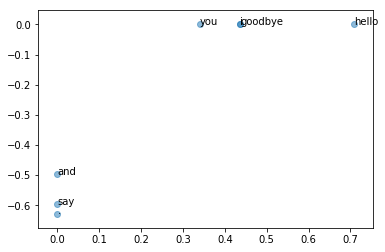

In [35]:
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

## PTB Dataset

In [38]:
import sys
import os

In [39]:
sys.path.append(os.path.join('.','dataset'))

In [40]:
import ptb

In [41]:
ptb_corpus, ptb_word_to_id, ptb_id_to_word = ptb.load_data("train")

In [42]:
print("Corpus Size: {}".format(len(ptb_corpus)))

Corpus Size: 929589


In [43]:
print("Corpus[:30]: ", ptb_corpus[:30])

Corpus[:30]:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [45]:
print("id_to_word[0]:", ptb_id_to_word[0])
print("id_to_word[1]:", ptb_id_to_word[1])
print("id_to_word[2]:", ptb_id_to_word[2])

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz


In [46]:
print("word_to_id['car']:", ptb_word_to_id["car"])
print("word_to_id['happy']:", ptb_word_to_id["happy"])
print("word_to_id['phone']:", ptb_word_to_id["phone"])

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['phone']: 2078


### Word Vectorizing for PTB dataset

In [51]:
window_size = 2
wordvec_size = 100

Load ptb dataset.

In [49]:
ptb_corpus, ptb_word_to_id, ptb_id_to_word = ptb.load_data("train")

In [50]:
ptb_vocab_size = len(ptb_word_to_id)

Create co-occurence matrix.

In [52]:
ptb_comatrix = create_to_matrix(ptb_corpus, ptb_vocab_size, window_size=window_size)

In [53]:
ptb_comatrix.shape

(10000, 10000)

Calculate PPMI matrix based on co-occurence matrix.

In [54]:
ptb_ppmi = ppmi(ptb_comatrix)

In [55]:
ptb_ppmi.shape

(10000, 10000)

Dimenional reduction by SVD.

In [56]:
from sklearn.utils.extmath import randomized_svd

In [67]:
U, S, V = randomized_svd(ptb_ppmi, n_components=wordvec_size, n_iter=10, random_state=None)

Using the first 100 features as the result of dimensional reduction.

In [68]:
word_vecs = U[:, :wordvec_size]

In [69]:
word_vecs.shape

(10000, 100)

In [70]:
querys = ["you", "year", "car", "toyota", "apple"]

In [71]:
for query in querys:
    print("query: {}".format(query))
    most_similar(query, ptb_word_to_id, ptb_id_to_word, word_vecs, top=5)
    print()

query: you
we: 0.8474894165992737
i: 0.835518479347229
they: 0.7204527258872986
anybody: 0.5257647037506104
nobody: 0.5103476643562317

query: year
week: 0.8896433115005493
month: 0.8722198605537415
day: 0.7615589499473572
period: 0.7120473384857178
decade: 0.7085340023040771

query: car
auto: 0.693113386631012
luxury-car: 0.617632269859314
jewelry: 0.6151658296585083
truck: 0.6021035313606262
pc: 0.5947726368904114

query: toyota
kuwait: 0.7164484858512878
aeroflot: 0.6360512971878052
pakistan: 0.6297904849052429
itel: 0.6189825534820557
narcotics: 0.6170586347579956

query: apple
chip: 0.46641382575035095
calif.-based: 0.44000428915023804
disks: 0.43988001346588135
penalty: 0.4360063970088959
drug: 0.4175451397895813

